# Problem Set 1 - Part 2: Logic and Lambda Calculus

In [1]:
# This task needs NLTK and Jupyter Notebook (IPython package).
import nltk
from nltk.grammar import FeatureGrammar
from utils import display_latex, display_translation, display_tree, display, Markdown

## Lambda calculus

### 1. Expression types in NLTK
What would be the possible semantic types of each expression type in NLTK?

You can translate logical and lambda expressions from string into one of the `nltk.sem.logic.Expression` types. Here is how:

In [2]:
read_expr = nltk.sem.Expression.fromstring

# different representations have different valid types:
expressions = [
    read_expr(r"x"),
    read_expr(r"P"),
    read_expr(r"rob"),
    read_expr(r"\x.P(x)"),
    read_expr(r"\x.homosapien(x)"),
    read_expr(r"P(x)"),
    read_expr(r"P(rob)"),
    read_expr(r"homosapien(rob)"),
    read_expr(r"(\y \x.love(x, y))(rob)"),
    read_expr(r"homosapien(rob) & run(rob)"),
    read_expr(r"exists x.(homosapien(x) & run(x))"),
    read_expr(r"all x.(homosapien(x) & run(x))"),
]

for expr in expressions:
    display_latex(expr, with_types=True)

display(Markdown(r"""
**Note**: *Python interprets `\` as a marker for special characters.
To prevent this, we use `r` in `r"strings"` in order to force the raw interpretation of strings.*
"""))

$x$ = `<IndividualVariableExpression x>`

$P$ = `<FunctionVariableExpression P>`

$rob$ = `<ConstantExpression rob>`

$\lambda\ x.P(x)$ = `<LambdaExpression \x.P(x)>`

$\lambda\ x.homosapien(x)$ = `<LambdaExpression \x.homosapien(x)>`

$P(x)$ = `<ApplicationExpression P(x)>`

$P(rob)$ = `<ApplicationExpression P(rob)>`

$homosapien(rob)$ = `<ApplicationExpression homosapien(rob)>`

$(\lambda\ y\ x.love(x,y))(rob)$ = `<ApplicationExpression (\y x.love(x,y))(rob)>`

$(homosapien(rob)\ \land\ run(rob))$ = `<AndExpression (homosapien(rob) & run(rob))>`

$\exists\ x.(homosapien(x)\ \land\ run(x))$ = `<ExistsExpression exists x.(homosapien(x) & run(x))>`

$\forall\ x.(homosapien(x)\ \land\ run(x))$ = `<AllExpression all x.(homosapien(x) & run(x))>`


**Note**: *Python interprets `\` as a marker for special characters.
To prevent this, we use `r` in `r"strings"` in order to force the raw interpretation of strings.*


Some well-formed expressions do not have a valid type in a model with basic *e-type* and *t-type*.

1a. Explain the problem with expression below **[2 mark]**:

In [3]:
# The following is an *AndExpression*, where semantically *rob* and *marry* are entities (e-types).
display_latex(read_expr(r"rob & marry"), with_types=True)

$(rob\ \land\ marry)$ = `<AndExpression (rob & marry)>`

*Write your answers here*

...

1b. Is there any approprate translation of types from NLTK expressions to logical types with basic `e-type` and `t-type`? Explain based on the examples above. **[4 marks]** 


For example:

- `IndividualVariableExpression` and `FunctionVariableExpression` can be any type. There is no specific type of value for it.
- `AndExpression` and `OrExpression` can be translated to t-type. (Because 1a)

Write your answers in front of these:

- `LambdaExpression`  ...
- `ConstantExpression`  ...
- `ExistsExpression` and `AllExpression` ...
- `ApplicationExpression`  ...


### 2. Translate verb phrases

Translate the verb phrases using $\lambda$ abstracts and verify the resulting formulae with `Expression.fromstring`.

In this task, you need to translate verb phrases similar to these example:

In [4]:
translations = {
    "read by Rob": read_expr(r"\x.read(rob, x)"),
    "read a book": read_expr(r"\x. exists y. (book(y) & read(x, y))"),
}

for text, expr in translations.items():
    display_translation(text, expr)

"read by Rob": $\lambda\ x.read(rob,x)$

"read a book": $\lambda\ x.\exists\ y.(book(y)\ \land\ read(x,y))$

Replace `xxx` with valid representations in dictionary of expressions **[4 marks]**:

In [5]:
# fix the following translations:
translations = {
    "be admired by no-one":        read_expr(r"xxx"),
    "catch a fish and eat it":     read_expr(r"xxx"),
    "read a book or watch a film": read_expr(r"xxx"),
    "give every boy a dime":       read_expr(r"xxx")
}

for text, expr in translations.items():
    display_translation(text, expr, to_latex=False)

"be admired by no-one": `<ConstantExpression xxx>`

"catch a fish and eat it": `<ConstantExpression xxx>`

"read a book or watch a film": `<ConstantExpression xxx>`

"give every boy a dime": `<ConstantExpression xxx>`

### 3. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[4 marks]**

In [6]:
e1 = read_expr(r'????')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with reuslt like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'????')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'????')
e2 = read_expr(r'\x.play(x,etude)') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r'????')
e2 = read_expr(r'\P.all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x.all z2.(musician(z2) -> like(x,z2))"))

$????(pip)$

$like(pip,rob)$

$????(\lambda\ x.play(x,scherzo))$

$play(pip,scherzo)$

$????(\lambda\ x.play(x,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$????(\lambda\ P.\forall\ x.(musician(x)\ \to\ P(x)))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \to\ like(x,z_{2}))$

### 4. Extend FCFG Grammar
Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences. The grammar is included in the code below as a string.

- no man gives a bone to a dog **[4 marks]**
- a boy and a girl chased every dog **[2 marks]**
- every dog chased a boy and a girl **[2 marks]**
- a brown cat chases a white dog **[4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature. In this example we have an intersective adjective. The denotiation we might want for brown cat is a set of individuals having a brown property and cat property.

In [7]:
fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

In [8]:
fcfg_string = fcfg_string_orginal + r"""
## Your answers here
# Det[???] -> ???
# TV[???] -> ???
# TV[???] -> ???
# CONJ -> ???
# NP[???] -> NP[???] CONJ NP[???]
# N[???] -> ???
# ADJ[???] -> ???
# NP[???] -> Det[???] ADJ[???] Nom[???]
"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

Run the code below without errors:

In [ ]:
# remove sentences if you couldn't find answer for them
sentences = [
    'no man gives a bone to a dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',
]
for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree


If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

### 5. Ambiguity in quantifiers

Explain ambiguity of these sentences. 

Use parse the following sentences:

- every dog bites a bone
- a man gives a bone to every dog
- every dog chased a boy and a girl *(optional)*

----

$\forall\ x.(dog(x)\ \to\ \exists\ z_{1}.(bone(z_{1})\ \land\ bite(x,z_{1})))$

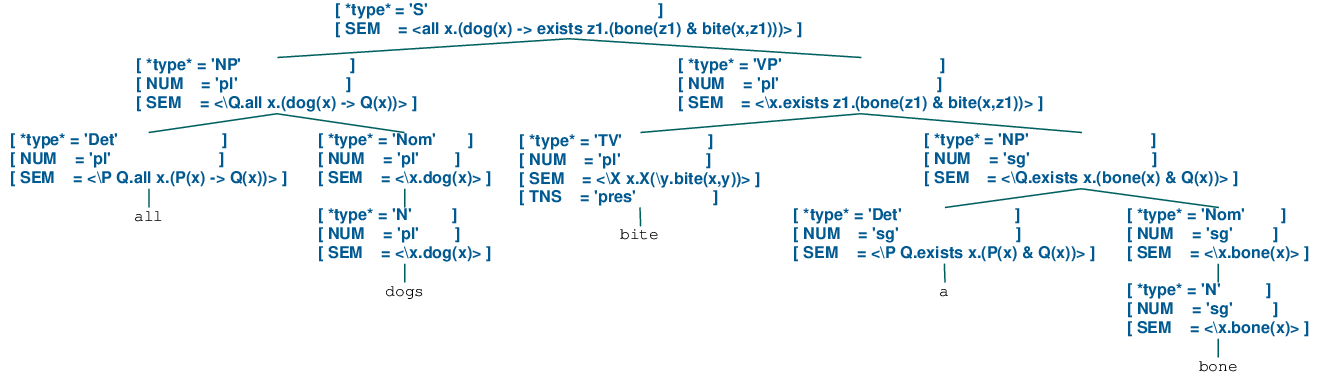

----

$\exists\ x.(man(x)\ \land\ \forall\ z_{3}.(dog(z_{3})\ \to\ \exists\ z_{2}.(bone(z_{2})\ \land\ give(x,z_{2},z_{3}))))$

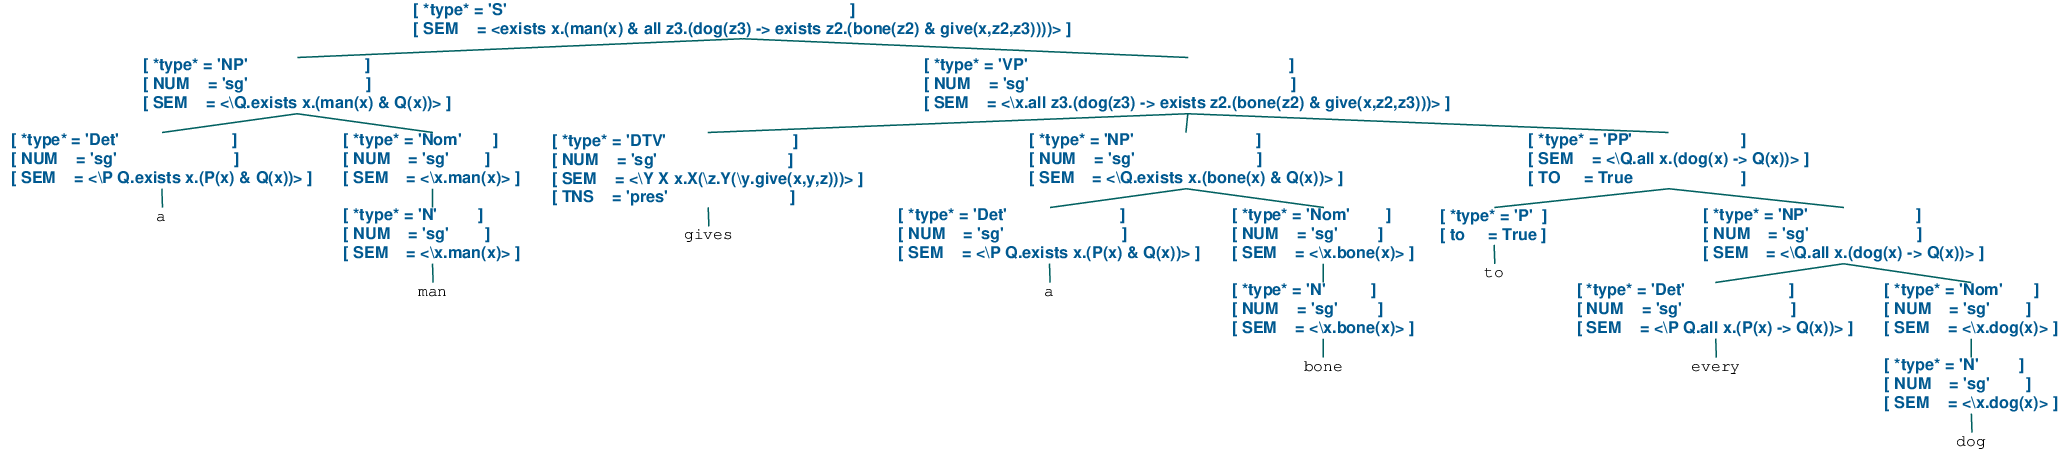

In [10]:
syntax = FeatureGrammar.fromstring(fcfg_string_orginal)
sentences = [
    'all dogs bite a bone',
    'a man gives a bone to every dog',
    #'every dog chased a boy and a girl',
]
sents_reps = []
for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree
        sents_reps.append(semrep)

5a. Write at least one alternative logical representation for each sentence. **[2+1 marks]**

In [11]:
# your answers here

# all dogs bite a bone
semrep = read_expr(r"???")
display_latex(semrep)

# a man gives a bone to every dog
semrep = read_expr(r"???")
display_latex(semrep)

# every dog chased a boy and a girl
semrep = read_expr(r"???")
display_latex(semrep)

$???$

$???$

$???$

5b. Are they semantic or syntactic ambiguities? **[2+1 marks]**

In [12]:
# your answers here


### 6. Model and valuation

Find a model for statements.

Original readings of two sentences in question 5 are false in the model below:

In [13]:
dom = set([
    'd1', 'd2', 'd3',
    'b1', 'b2',
    'g1', 'g2',
    'm1', 'm2',
    'bn1', 'bn2'
])
val = nltk.Valuation.fromstring("""
dog   => {d1, d2, d3}
boy   => {b1, b2}
girl  => {g1, g2}
man   => {m1, m2}
bone  => {bn1, bn2}
bite  => {(d1, bn1)}
give  => {(m1, bn1, d1)}
""")

g = nltk.Assignment(dom)
m = nltk.Model(dom, val)

for semrep in sents_reps:
    print(m.evaluate(str(semrep), g))
    display_latex(semrep)
    display(Markdown('----'))

False


$\forall\ x.(dog(x)\ \to\ \exists\ z_{1}.(bone(z_{1})\ \land\ bite(x,z_{1})))$

----

False


$\exists\ x.(man(x)\ \land\ \forall\ z_{3}.(dog(z_{3})\ \to\ \exists\ z_{2}.(bone(z_{2})\ \land\ give(x,z_{2},z_{3}))))$

----

6a. Change the sets of `bite` and `give` in the model, so two sentences in question 5 become true. **[4 marks]**

In [ ]:
# answers here
# copy from the model above then modify bite and give.


6b. *(optional)* Write a mobification of `bite` and `give` which the alternative reading in 5a become true. (If you already have that in 6a write a model that the alternative reading in 5a is false but the original reading is true)   **[4 marks]**

In [ ]:
# answers here



6c. *(optional)* extend the world model with `chase`, repeat 6a and 6b for "every dog chased a boy and a girl". **[4 marks]**

In [ ]:
# answers here



## Submitting your answers

There are **34 marks** and **10 optional marks** on this problem-set. In order to obtain a G you need at least **17 marks**. In order to obtain a VG you need at least **26 marks**.

The lab is meant as an exploration and learning exercise. If you get stuck, please write your questions to the discussion topic for this lab. 